# Supervised Learning - Project

In this Project, we are going to perform a full unsupervised learning machine learning project on a "Wholesale Data" dataset. The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

[Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

# Part I : EDA - Exploratory Data Analysis & Pre-processing

The given dataset seems to be a grocery sales dataset containing information about various products sold by a grocery store. To perform an exploratory data analysis (EDA) on this dataset, we can perform the following tasks:

- Data Import: Import the dataset into a statistical software tool such as Python or R.
- Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.
Data Description: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.
- Data Visualization: Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.
- Outlier Detection: Check for any outliers in the dataset and determine whether they are valid or erroneous data points.
- Correlation Analysis: Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.
- Data Transformation: If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.
- Feature Selection: Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

In [2]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings

# Disable all warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('Wholesale_Data.csv')
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [4]:
# check for nulls
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [5]:
df = df.dropna(axis=0, how='any')

In [6]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


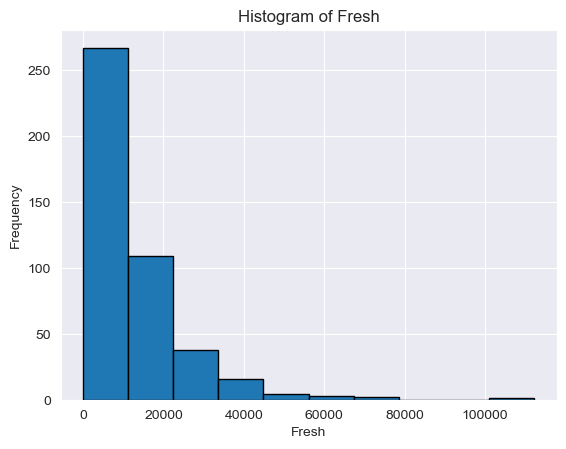

In [7]:
#Histogram
plt.hist(df['Fresh'], bins=10, edgecolor='black')
plt.xlabel('Fresh')
plt.ylabel('Frequency')
plt.title('Histogram of Fresh')
plt.show()

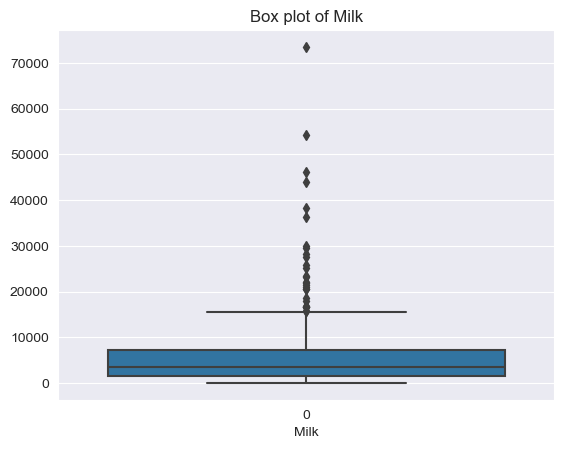

In [8]:
# Box plot

sns.boxplot(df['Milk'])
plt.xlabel('Milk')
plt.title('Box plot of Milk')
plt.show()

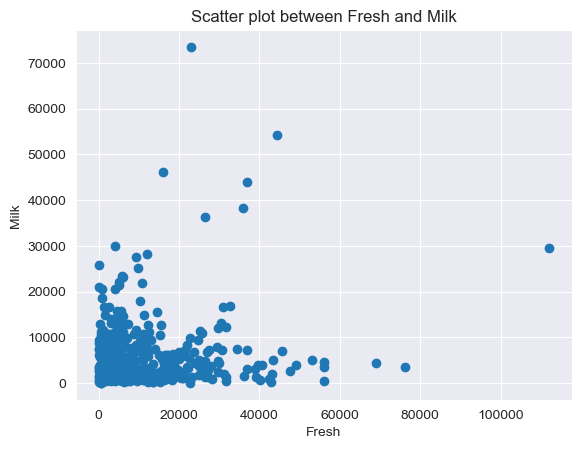

In [9]:
# Scatter Plot
plt.scatter(df['Fresh'], df['Milk'])
plt.xlabel('Fresh')
plt.ylabel('Milk')
plt.title('Scatter plot between Fresh and Milk')
plt.show()

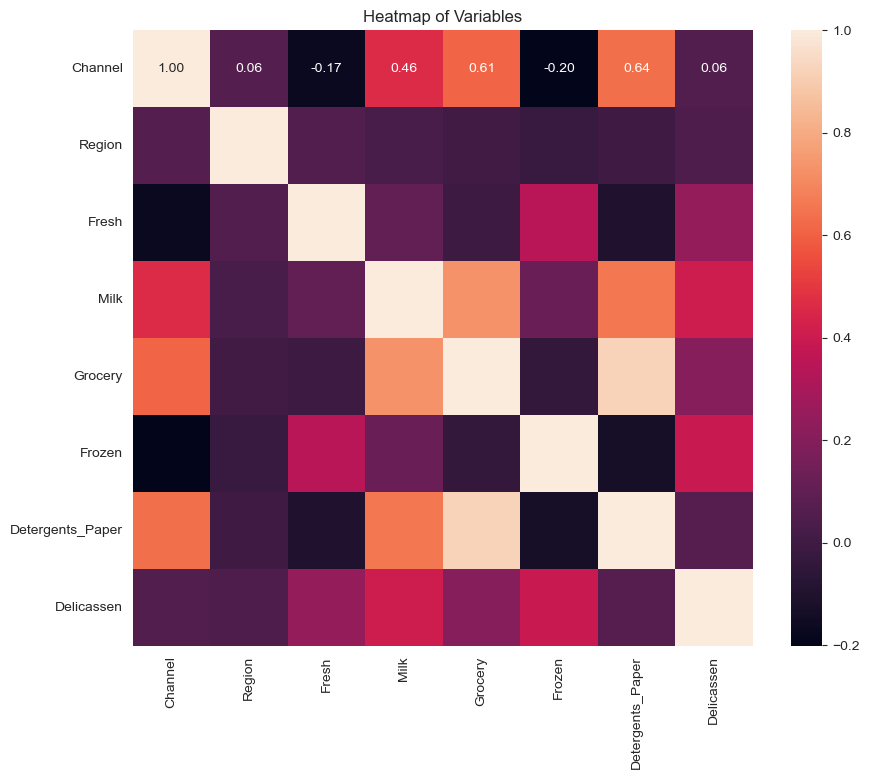

In [10]:
# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.title('Heatmap of Variables')
plt.show()

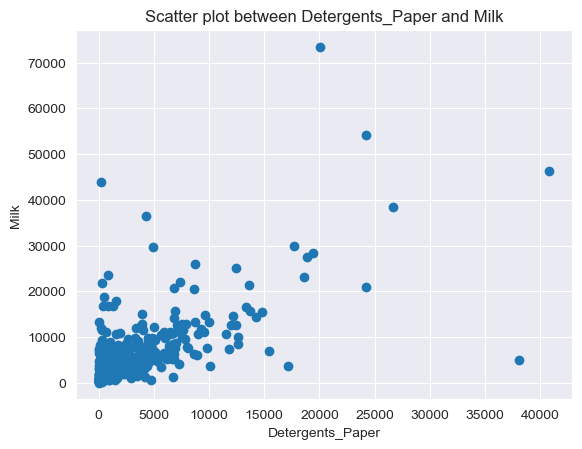

In [11]:
# Scatter Plot
plt.scatter(df['Detergents_Paper'], df['Milk'])
plt.xlabel('Detergents_Paper')
plt.ylabel('Milk')
plt.title('Scatter plot between Detergents_Paper and Milk')
plt.show()

#### Checking outliers and removing 

In [12]:
df['Milk'].gt(20000).sum()

20

In [13]:
# drop anything greater than 20000
df = df[df['Milk'] <= 20000]
df 

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


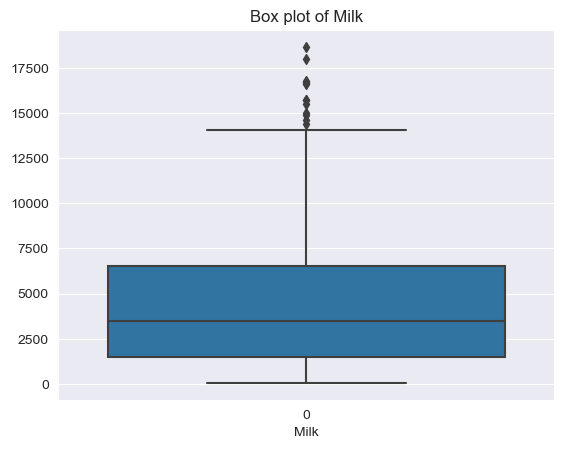

In [14]:
# recreate boxplot for df
sns.boxplot(df['Milk'])
plt.xlabel('Milk')
plt.title('Box plot of Milk')
plt.show()

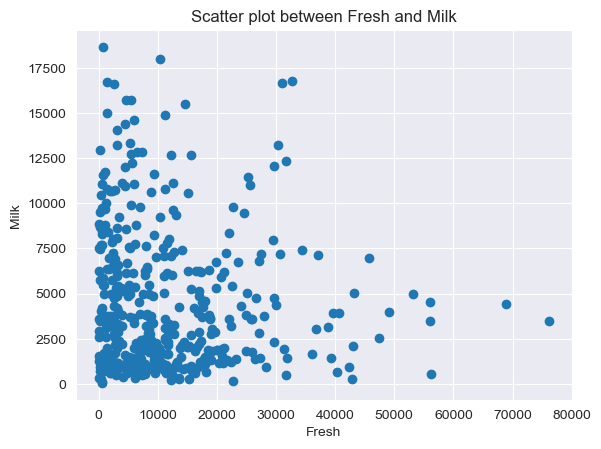

In [15]:
# Scatter plot showing correlation between Fresh and Milk
plt.scatter(df['Fresh'], df['Milk'])
plt.xlabel('Fresh')
plt.ylabel('Milk')
plt.title('Scatter plot between Fresh and Milk')
plt.show()

# Less outliers than before

# Part II - KMeans Clustering

The objective of the analysis is to group similar products together into clusters based on their attributes such as fresh, milk, grocery, frozen, detergents_paper, and delicatessen. To perform the k-means clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters, initialize the centroids, assign data points to clusters, update the centroids, and repeat until convergence.

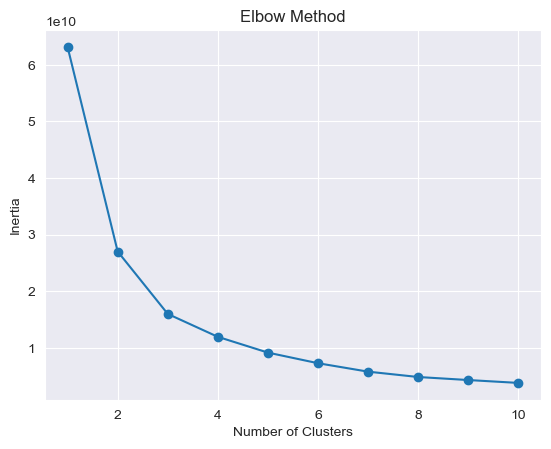

In [16]:
# perform kmeans clustering on the above dataframe, determine the optimal number of clusters
from sklearn.cluster import KMeans

# create a list to store the inertia values
inertia = []

# iterate over a range of possible number of clusters
for k in range(1, 11):
    # create a KMeans object with k clusters
    kmeans = KMeans(n_clusters=k, random_state=0)
    # fit the data to the KMeans object
    kmeans.fit(df[['Fresh', 'Milk']])
    # append the inertia value to the list
    inertia.append(kmeans.inertia_)

# plot the inertia values
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

Value for k = 3 based on elbow plot

In [17]:
# continue k-means clustering by initializing the centroids for k=3 and assign data point to clusters
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(df[['Fresh', 'Milk']])
df['Cluster'] = kmeans.predict(df[['Fresh', 'Milk']])
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,2,3,12669,9656,7561,214,2674,1338,0
1,2,3,7057,9810,9568,1762,3293,1776,0
2,2,3,6353,8808,7684,2405,3516,7844,0
3,1,3,13265,1196,4221,6404,507,1788,1
4,2,3,22615,5410,7198,3915,1777,5185,1
...,...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204,1
436,1,3,39228,1431,764,4510,93,2346,2
437,2,3,14531,15488,30243,437,14841,1867,1
438,1,3,10290,1981,2232,1038,168,2125,0


# Part III - Hierarchical Clustering 

Hierarchical clustering is a popular unsupervised machine learning algorithm that is used to identify patterns and group similar data points together in a hierarchy. The algorithm works by iteratively merging or splitting clusters based on a similarity measure until a dendrogram is formed.

To perform hierarchical clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters using techniques such as dendrogram.

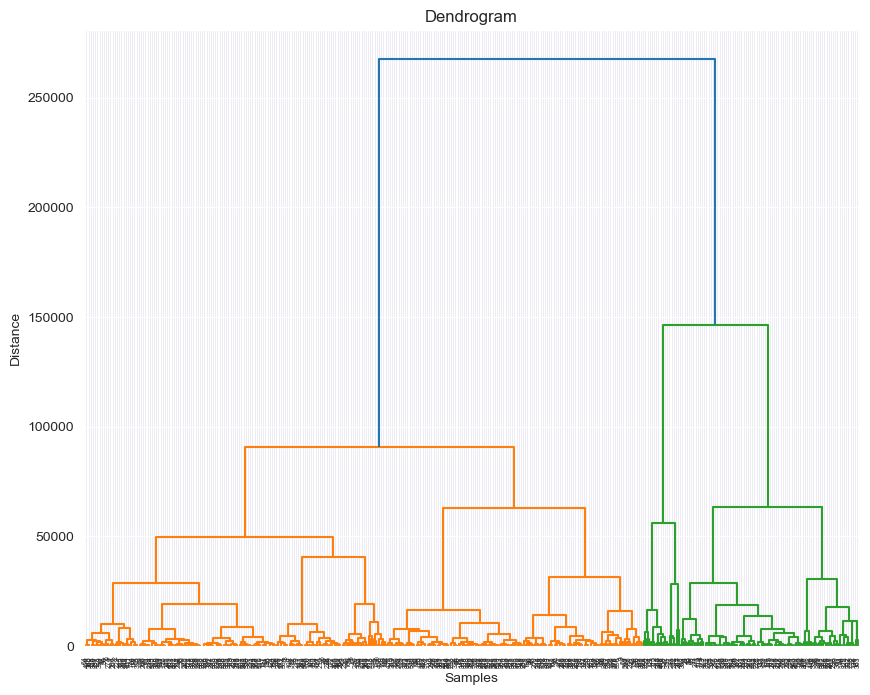

In [19]:
# apply hierarchiecal clustering to the df dataframe
from scipy.cluster.hierarchy import dendrogram, linkage

# calculate the linkage matrix
Z = linkage(df[['Fresh', 'Milk']], method='ward')

# plot the dendrogram
plt.figure(figsize=(10, 8))
dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

# Part IV - PCA

In this section you are going to perform principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

In [20]:
# perform principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data - df
from sklearn.decomposition import PCA
# create a PCA object with 2 components
pca = PCA(n_components=2)
# fit the data to the PCA object
pca.fit(df[['Fresh', 'Milk']])
# transform the data to the first 2 principal components
df_pca = pca.transform(df[['Fresh', 'Milk']])
df_pca

array([[ 8.09251668e+02,  5.11965916e+03],
       [-4.80479592e+03,  5.09264637e+03],
       [-5.47612513e+03,  4.06847007e+03],
       [ 1.67769503e+03, -3.31672763e+03],
       [ 1.08869736e+04,  1.19652879e+03],
       [-2.40001594e+03,  3.61841088e+03],
       [ 4.74709760e+02, -1.35149064e+03],
       [-4.12657272e+03,  2.57999199e+02],
       [-5.69956228e+03, -1.10142120e+03],
       [-5.89661389e+03,  6.34109481e+03],
       [-8.35179400e+03,  5.68938313e+02],
       [ 1.56107819e+03, -3.39252680e+03],
       [ 1.97584950e+04,  8.39529187e+03],
       [ 9.46397261e+03,  1.94904196e+03],
       [ 1.27931796e+04,  5.31512657e+03],
       [-1.33009546e+03, -3.49579288e+03],
       [-1.08066107e+04,  3.90452824e+03],
       [-5.86740804e+03,  1.40346957e+03],
       [ 6.84549595e+03,  1.98363940e+03],
       [-3.84633376e+03, -2.19524113e+03],
       [ 5.84933491e+03,  1.42565744e+02],
       [-6.00582503e+03, -3.88974474e+03],
       [ 1.96560866e+04, -2.01542186e+03],
       [ 1.

# Part V - Conclusion

From the model you developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.